## Training a Classifier

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


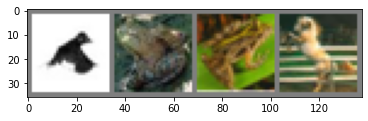

 bird  frog  frog horse


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.219
[1,  4000] loss: 1.837
[1,  6000] loss: 1.678
[1,  8000] loss: 1.590
[1, 10000] loss: 1.532
[1, 12000] loss: 1.477
[2,  2000] loss: 1.413
[2,  4000] loss: 1.373
[2,  6000] loss: 1.360
[2,  8000] loss: 1.338
[2, 10000] loss: 1.315
[2, 12000] loss: 1.276
Finished Training


In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

### Testing

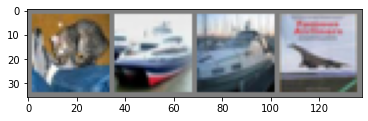

GroundTruth:    cat  ship  ship plane


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = net(images)

In [ ]:
# outputs

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    dog plane  ship plane


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 68 %
Accuracy of   car : 63 %
Accuracy of  bird : 43 %
Accuracy of   cat : 36 %
Accuracy of  deer : 38 %
Accuracy of   dog : 46 %
Accuracy of  frog : 66 %
Accuracy of horse : 65 %
Accuracy of  ship : 68 %
Accuracy of truck : 61 %


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [ ]:
# !nvidia-smi

In [ ]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
inputs, labels = data[0].to(device), data[1].to(device)


NameError: name 'data' is not defined

In [ ]:
# optimizer.to(device)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.215
[1,  4000] loss: 1.232
[1,  6000] loss: 1.216
[1,  8000] loss: 1.198
[1, 10000] loss: 1.171
[1, 12000] loss: 1.184
[2,  2000] loss: 1.117
[2,  4000] loss: 1.101
[2,  6000] loss: 1.123
[2,  8000] loss: 1.126
[2, 10000] loss: 1.121
[2, 12000] loss: 1.109
Finished Training


### SA net architecture

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(32, 3, 9, 3)
        self.pool1 = nn.MaxPool2d(4, 3)
        self.conv2 = nn.Conv2d(32, 3, 9, 3)
        self.conv3 = nn.Conv2d(32, 3, 9, 3)
        self.pool2 = nn.MaxPool2d(2, 3)
        self.conv4 = nn.Conv2d(32, 3, 9, 3)
        self.conv5 = nn.Conv2d(32, 3, 9, 3)
        self.pool3 = nn.MaxPool2d(2, 2)
        
        self.fc1_1 = nn.Linear(16 * 5 * 5, 128) # Change input dimension
        self.fc1_2 = nn.Linear(128, 64) # Change input dimension
        self.fc1_3 = nn.Linear(64, 32) # Change input dimension
        
        
#         self.fc2_1 = nn.Linear(16 * 5 * 5, 64) # Change input dimension
#         self.fc2_2 = nn.Linear(64, 64) # Change input dimension
        
        
        
#         self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.pool2(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.pool3(x)
        
        x = x.view()
        x1 = self.fc1_1(x)
        x1 = self.fc1_2(x1)
        
#         x2 = self.fc2_1(x)
#         x2 = self.fc2_2(x2)
                        
                        
        
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = x.view(-1, 16 * 5 * 5)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
        return x


net = Net()

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F


# Softmax is also in torch.nn.functional
data = torch.randn(5,4)
print(data)
print(F.softmax(data, dim=0))
print(F.softmax(data, dim=0).sum())  # Sums to 1 because it is a distribution!
print(F.log_softmax(data, dim=0))  # theres also log_softmax


tensor([[ 0.6720,  0.0913, -0.1791,  0.4348],
        [-0.1109, -1.5744, -0.4543, -1.0833],
        [ 1.0513,  0.1957, -0.6680, -0.5229],
        [ 0.1135,  0.3553,  0.0778, -0.4521],
        [-0.6803,  1.0699,  1.7088, -0.2353]])
tensor([[0.2667, 0.1597, 0.0974, 0.3958],
        [0.1219, 0.0302, 0.0739, 0.0867],
        [0.3898, 0.1773, 0.0597, 0.1519],
        [0.1526, 0.2080, 0.1259, 0.1630],
        [0.0690, 0.4249, 0.6431, 0.2025]])
tensor(4.0000)
tensor([[-1.3214, -1.8345, -2.3293, -0.9268],
        [-2.1044, -3.5002, -2.6046, -2.4449],
        [-0.9422, -1.7301, -2.8183, -1.8845],
        [-1.8800, -1.5705, -2.0724, -1.8138],
        [-2.6738, -0.8559, -0.4414, -1.5969]])
